In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

c:\Users\Jakob\anaconda3\envs\COMPHY\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


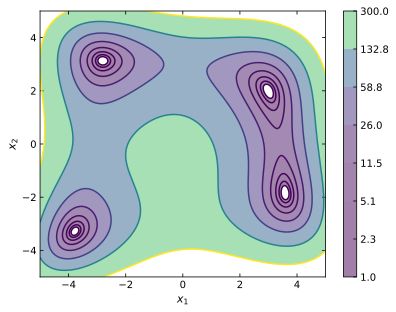

In [2]:
# Make a contour plot for the function
vals = torch.linspace(-5, 5, 250, dtype=torch.float32, requires_grad=True)
x1d, x2d = torch.meshgrid(vals, vals)

f = lambda x1, x2: (x1**2 +x2 - 11)**2 + (x1 + x2**2 - 7)**2
yd = f(x1d, x2d)

fig, ax = plt.subplots()
levels = torch.logspace(0, np.log10(300), 8)
with torch.no_grad():
    ax.contour(x1d, x2d, yd, levels=levels)
    color_map = ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
fig.colorbar(color_map, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')

fig.savefig('ex43_fig1.png')

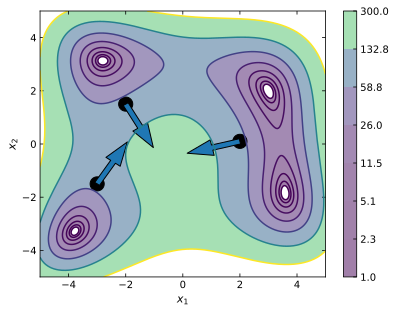

In [3]:
# Use pytorch to evaluate the gradients and plot them.

# I'll redefine everything to avoid any conflict with the previous code.
vals = torch.linspace(-5, 5, 250, dtype=torch.float32, requires_grad=True)
x1d, x2d = torch.meshgrid(vals, vals)

f = lambda x1, x2: (x1**2 +x2 - 11)**2 + (x1 + x2**2 - 7)**2
yd = f(x1d, x2d)

fig, ax = plt.subplots()
levels = torch.logspace(0, np.log10(300), 8)
with torch.no_grad():
    ax.contour(x1d, x2d, yd, levels=levels)
    color_map = ax.contourf(x1d, x2d, yd, levels=levels, alpha=0.5)
fig.colorbar(color_map, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')

for P0 in [[-2, 1.5], [2, 0.1], [-3, -1.5]]:
    P0 = torch.tensor(P0, dtype=torch.float32, requires_grad=True)
    
    # Forward pass
    func_value = f(*P0)
    
    # Backward pass (compute the gradients)
    func_value.backward()
    
    # Compute the gradient vector
    grad_of_y = P0.grad.detach().numpy()
    
    # Normalize the gradient vector
    v = grad_of_y / np.linalg.norm(grad_of_y)
    
    # Plot the point and the gradient arrow
    ax.scatter(*P0.detach().numpy(), s=200, c='k')  # Plot the point
    ax.arrow(P0[0].item(), P0[1].item(), v[0], v[1], width=0.2)  # Plot the gradient vector

fig.savefig('ex43_fig2.png')